In [1]:
import numpy as np
!git clone https://github.com/smcantab/chen5595-fall2020
data = np.loadtxt('./chen5595-fall2020/homework/mgm-hw7.txt')

Cloning into 'chen5595-fall2020'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 463 (delta 48), reused 74 (delta 39), pack-reused 376
Receiving objects: 100% (463/463), 3.95 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (261/261), done.


No.of iterations = 3


Text(0.5, 1.0, 'KMean Class Results - Final Iteration')

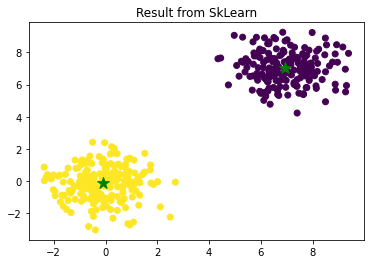

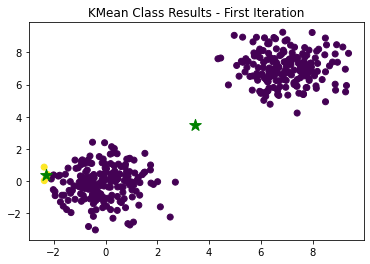

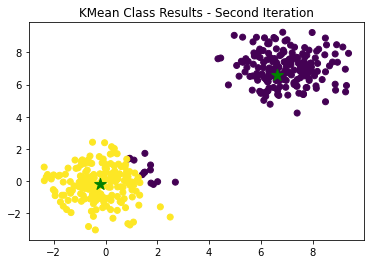

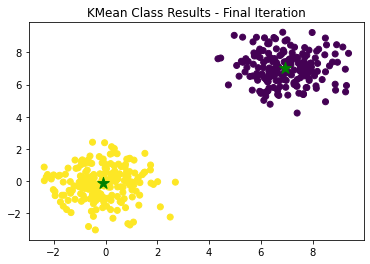

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import copy

#Result from Sklearn
Kmean = KMeans(n_clusters = 2)
Kmean.fit(data)
prediction = Kmean.predict(data)
centers = Kmean.cluster_centers_ 
plt.scatter(data[:,0],data[:,1],c=prediction)
plt.scatter(centers[:,0],centers[:,1],marker='*',s=150,c='g')
plt.title('Result from SkLearn')

#Own Implementation 
class Kmeans(object):
    """
    Constructor of K-mean
    Parameters
    ----------
    n_clusters : int
    number of cluster
    mu : (n_components, ndim) np.ndarray
    center of mass of each cluster
    """
    def __init__(self, n_clusters, centers,iter_max):
        self.n_clusters = n_clusters
        self.centers = centers
        self.iter_max = iter_max
    
    def _expectation(self, X):
        distance = pairwise_distances(X,self.centers,metric = 'euclidean')
        self.R = np.argmin(distance,axis=1)
        return self.R

    def _maximization(self, X):
        # performs the M step
        # updates self.centers
        centers_new = []
        for i in range(self.n_clusters): 
            centers_new.append(X[self.R == i].mean(axis=0)) 
        self.centers = centers_new     
        return self.centers

    def fit(self, X):
        # perform the E and M steps of the K-means algorithm
        # for up to itera_max
        for i in range(self.iter_max): 
          centers_old = copy.deepcopy(self.centers)
          self.R = self._expectation(X)
          self.centers = self._maximization(X)
          if np.allclose(centers_old,self.centers):
            print('No.of iterations =',i)
            break
              
    def responsibilities(self, X):
        return self._expectation(X)

#Plotting different iterations, while showing the different centers and colours of clustering
plt.figure()
km = Kmeans(2,([2,6],[0,7]),1)
km.fit(data)
centers_test = km.centers
predictions = km.R
plt.scatter(data[:,0],data[:,1],c=predictions)
plt.scatter(centers_test[0][0],centers_test[0][1],marker='*',s=150,c='g')
plt.scatter(centers_test[1][0],centers_test[1][1],marker='*',s=150,c='g')
plt.title('KMean Class Results - First Iteration')

plt.figure()
km = Kmeans(2,([2,6],[0,7]),2)
km.fit(data)
centers_test = km.centers
predictions = km.R
plt.scatter(data[:,0],data[:,1],c=predictions)
plt.scatter(centers_test[0][0],centers_test[0][1],marker='*',s=150,c='g')
plt.scatter(centers_test[1][0],centers_test[1][1],marker='*',s=150,c='g')
plt.title('KMean Class Results - Second Iteration')

plt.figure()
km = Kmeans(2,([2,6],[0,7]),100)
km.fit(data)
centers_test = km.centers
predictions = km.R
plt.scatter(data[:,0],data[:,1],c=predictions)
plt.scatter(centers_test[0][0],centers_test[0][1],marker='*',s=150,c='g')
plt.scatter(centers_test[1][0],centers_test[1][1],marker='*',s=150,c='g')
plt.title('KMean Class Results - Final Iteration')